# 100 ejercicios pandas

Dado que Pandas es una biblioteca grande con muchas funciones y características especializadas, estos ejercicios se centran principalmente en los fundamentos de la manipulación de datos (indexación, agrupación, agregación, limpieza), haciendo uso de los objetos principales DataFrame y Series.

Muchos de los ejercicios aquí son sencillos en el sentido de que las soluciones requieren no más de unas pocas líneas de código (en Pandas o NumPy... ¡no uses Python puro o Cython!). Elegir los métodos correctos y seguir las mejores prácticas es el objetivo subyacente.

Los ejercicios están divididos en secciones de manera general. Cada sección tiene una calificación de dificultad; estas calificaciones son subjetivas, por supuesto, pero deben verse como una guía aproximada de cuán ingeniosa debe ser la solución requerida.

Si estas interesado en continuar preparandote en Pandas, estos recursos pueden ser de utilidad:

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)


## DataFrames: problemas mas dificiles 

## Limpiando Data

### Haciendo un DataFrame mas sencillo para trabajar

Dificultad: *media*

Esto sucede todo el tiempo: alguien te da datos que contienen cadenas mal formadas, listas de Python y datos faltantes. ¿Cómo lo ordenas para poder continuar con el análisis?

Toma esta monstruosidad como el DataFrame a utilizar en los siguientes ejercicios:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Debe aparecer asi:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

(Son datos de vuelos simulados, no representan ningun valor real)

**26.** Algunos valores en la columna **FlightNumber** estan asuentes (son `NaN`). Estos valores representan incrementos de 10 entre cada fila, asi que 10055 y 10075 deberian ser colocados. Modifica `df` para rellenar automaticamente estos espacios con valores en una columna entera (en lugar de flotante).

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


**27.** La columna **From\_To** deberia ser separada en dos! Corta cada cadena de caracteres utilizando el separador `_` guardando estos cambios en un DataFrame temporal llamado 'temp' que incluya los valores correctos. Denomina las dos nuevas columnas como 'From' y 'To' en este nuevo DataFrame. 

In [5]:
df['From'] = df['From_To'].apply(lambda x: x.split('_')[0].capitalize())
df['To'] = df['From_To'].apply(lambda x: x.split('_')[1].capitalize())

df.drop('From_To', axis=1, inplace=True)
df.insert(0, 'From', df.pop('From'))
df.insert(1, 'To', df.pop('To'))

df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


**28.** Nota como las mayusculas y minusculas son un desastre en el DataFrame 'temp'. Estandariza las cadenas de caracteres para que solo la primer letra sea mayuscula (ejemplo: "londON" deberia ser "London".)

In [ ]:
# done

**29.** Elimina la columna **From_To** de `df` y coloca el DataFrame 'temp' de la pregunta anterior.

In [ ]:
# done

**30**. En la columna **Airline**, puedes ver que hay puntuaciones y caracteres especiales con los nombres de las aerolineas. Limpialos para solo mostrar los nombres. Ejemplo: `'(British Airways. )'` debe convertirse en `'British Airways'`.

In [7]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM
1,Madrid,Milan,10055,[],Air France
2,London,Stockholm,10065,"[24, 43, 87]",British Airways
3,Budapest,Paris,10075,[13],Air France
4,Brussels,London,10085,"[67, 32]",Swiss Air


**31** En la columna **RecentDelays**, los valores se han ingresado en el DataFrame como una lista. Queremos que cada primer valor esté en su propia columna, cada segundo valor en su propia columna, y así sucesivamente. Si no existe un valor en la posición N, el valor debe ser NaN.

Expande la Serie de listas en un nuevo DataFrame llamado delays, renombra las columnas como delay_1, delay_2, etc., y reemplaza la columna no deseada RecentDelays en df con delays.

In [12]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)
df

,From,To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,London,Paris,10045,KLM,23.0,47.0,NaN
1,Madrid,Milan,10055,Air France,NaN,NaN,NaN
2,London,Stockholm,10065,British Airways,24.0,43.0,87.0
3,Budapest,Paris,10075,Air France,13.0,NaN,NaN
4,Brussels,London,10085,Swiss Air,67.0,32.0,NaN


## Gráficas
## Visualiza tendencias y patrones en los datos
Dificultad: *media*

Para comprender realmente los datos contenidos en tu DataFrame, a menudo es esencial crear gráficos: si tienes suerte, las tendencias y anomalías saltarán a la vista de inmediato. Esta funcionalidad está integrada en pandas y los ejercicios a continuación exploran algunas de las posibilidades que ofrece esta biblioteca.

¡Pandas está altamente integrado con la biblioteca de gráficos matplotlib, lo que hace que graficar DataFrames sea muy fácil de usar! Graficar en un entorno de notebook generalmente utiliza el siguiente código básico:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

**matplotlib** es la biblioteca de gráficos sobre la cual se basa la funcionalidad de gráficos de pandas, y generalmente se la denomina plt.

**%matplotlib** inline le indica al notebook que muestre los gráficos en línea, en lugar de crearlos en una ventana separada.

**plt.style.use('ggplot')** es un tema de estilo que la mayoría de las personas encuentran agradable, basado en el estilo del paquete ggplot de R

**32** Haz un gráfico de dispersión (scatter plot) de estos datos aleatorios, pero utiliza "X" negras en lugar de los marcadores predeterminados.

```
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
```

<Axes: xlabel='xs', ylabel='ys'>

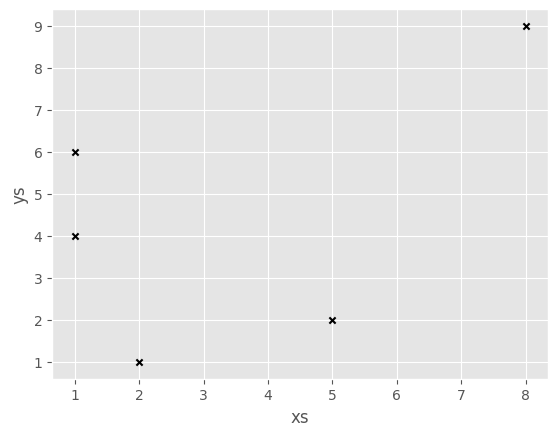

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter("xs", "ys", color = "black", marker = "x")



**33** Las columnas en tu DataFrame también pueden usarse para modificar colores y tamaños. Haz un gráfico que incorpore las cuatro características de este DataFrame.

(Pista: Si tienes problemas para ver el gráfico, intenta multiplicar la Serie que elijas para representar el tamaño por 10 o más).

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

In [ ]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})



**34** ¿Qué pasa si queremos graficar múltiples elementos? Pandas te permite pasar un objeto Axis de matplotlib para los gráficos, y los gráficos también devolverán un objeto Axis.

Haz un gráfico de barras del ingreso mensual con un gráfico de líneas del gasto mensual en publicidad (números en millones).

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

In [ ]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })



Ahora finalmente estamos listos para crear un gráfico de velas, que es una herramienta muy común utilizada para analizar datos de precios de acciones. Un gráfico de velas muestra el precio de apertura, cierre, máximo y mínimo de una acción durante un intervalo de tiempo. El color de la "vela" (la parte gruesa de la barra) es verde si la acción cerró por encima de su precio de apertura, o roja si cerró por debajo.

Esto fue inicialmente diseñado como un desafío de gráficos con pandas, pero resulta que este tipo de gráfico no es factible utilizando solo los métodos de pandas. Si no estás familiarizado con matplotlib, hemos proporcionado una función que graficará el gráfico por ti siempre y cuando puedas usar pandas para obtener los datos en el formato correcto.

Tu primer paso debería ser obtener los datos en el formato correcto utilizando la función de agrupación de series temporales de pandas. Queremos que cada vela represente una hora de datos. Puedes escribir tu propia función de agregación que devuelva los valores de apertura/máximo/mínimo/cierre, pero pandas tiene una función incorporada que también hace esto.

La celda a continuación contiene funciones auxiliares. Llama a day_stock_data() para generar un DataFrame que contenga los precios a los que una acción hipotética se vendió y el momento en que ocurrió la venta. Llama a plot_candlestick(df) en tus datos de acciones correctamente agregados y formateados para imprimir el gráfico de velas.

In [ ]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #la bolsa de Nueva York esta abierta de 9:30 a 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

def plot_candlestick(agg):
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Precio")
    ax.set_xlabel("Hora")
    ax.set_title("Valor OHLC de las acciones durante el día")
    plt.show()

**35** Genera un día completo de datos de acciones aleatorios y agrégalo / reformátalo para que tenga resúmenes horarios de los precios de apertura, máximo, mínimo y cierre (OHLC)

In [ ]:
df = day_stock_data()
df.head()



**36** Ahora que tienes tus datos correctamente formateados, intenta graficarlos tú mismo como un gráfico de velas.

Usa la función plot_candlestick(df) definida arriba.